<a href="https://colab.research.google.com/github/DajeanArcila/biblioteca_pandas/blob/main/desafio_RotatividadeRRHH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import  StandardScaler

In [60]:
df=pd.read_excel("/content/Base_dados - Rotatividade RH (1).xlsx")

In [61]:
df.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0


In [62]:
df.describe()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Desligamento
count,650,144,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,2022-10-31 06:38:46.153846272,2024-05-14 00:00:00,18.690769,28.349231,3.027463,2.940577,6131.587062,10.098864,0.221538
min,2021-06-29 00:00:00,2024-05-14 00:00:00,3.000000,18.000000,1.000242,1.002868,2004.500000,0.003734,0.000000
25%,2022-02-24 00:00:00,2024-05-14 00:00:00,10.000000,22.000000,1.988753,1.968571,4023.752500,4.978000,0.000000
50%,2022-10-22 00:00:00,2024-05-14 00:00:00,19.000000,27.000000,3.058911,2.923458,5562.950000,9.413546,0.000000
75%,2023-07-19 00:00:00,2024-05-14 00:00:00,27.000000,33.000000,4.022709,3.964356,7814.480000,14.749310,0.000000
max,2024-02-14 00:00:00,2024-05-14 00:00:00,35.000000,49.000000,4.992102,4.999415,11957.290000,41.638350,1.000000
std,NaN,NaN,9.652262,8.014983,1.174226,1.148514,2689.075566,6.242406,0.415602


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ KB


In [64]:
df.isnull().sum()

Data_Contratacao          0
Data_Desligamento       506
Meses_de_Servico          0
Idade                     0
Pontuacao_Desempenho      0
Satisfacao_Trabalho       0
Nivel_Cargo               0
Salario                   0
Horas_Extras              0
Desligamento              0
dtype: int64

In [65]:
#EVALUAR
#hacer una columna para saber si la persona esta contratada o no
df['Desligado'] = df['Data_Desligamento'].notnull().astype(int)

In [66]:
#EVALUAR
#eliminar columnas que ya no necesitaremos
df = df.drop(columns=['Data_Contratacao', 'Data_Desligamento'])

In [67]:
df.head()

,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Desligado
0,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0,0
1,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,1
2,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0,0
3,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0,0
4,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0,0


In [68]:
media_idade = df['Idade'].mean()
media_salario= df['Salario'].mean()
print('a idade media e: {:.0f} anos '.format(media_idade))
print('a media salarial e de: R${:.2f}'.format(media_salario))

a idade media e: 28 anos 
a media salarial e de: R$6131.59


In [69]:
meses_serviço= df['Meses_de_Servico'].max()
print('o max de meses de serviço registrado e de:',meses_serviço)
meses_serviço= df['Meses_de_Servico'].mean()
print('a media de meses_serviço geral e de: {:.2f}'.format(meses_serviço))

o max de meses de serviço registrado e de: 35
a media de meses_serviço geral e de: 18.69


In [70]:
df.count()

Meses_de_Servico        650
Idade                   650
Pontuacao_Desempenho    650
Satisfacao_Trabalho     650
Nivel_Cargo             650
Salario                 650
Horas_Extras            650
Desligamento            650
Desligado               650
dtype: int64

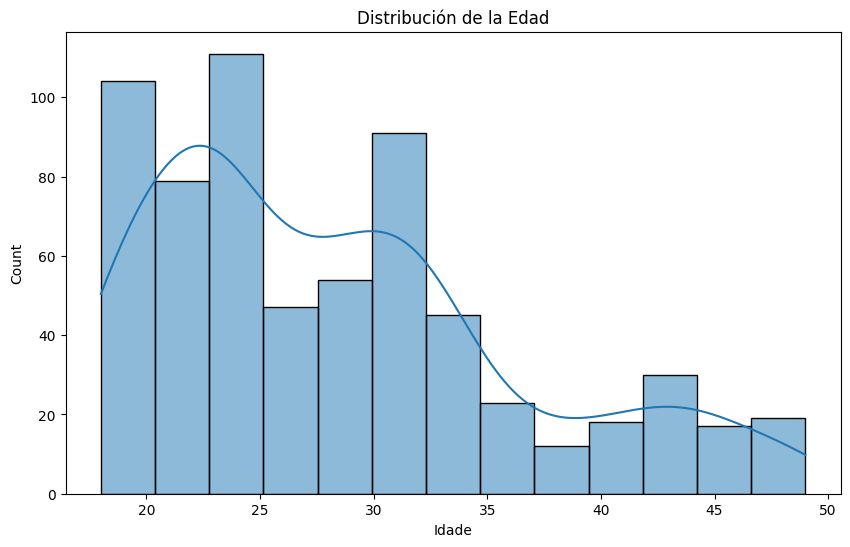

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Idade'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

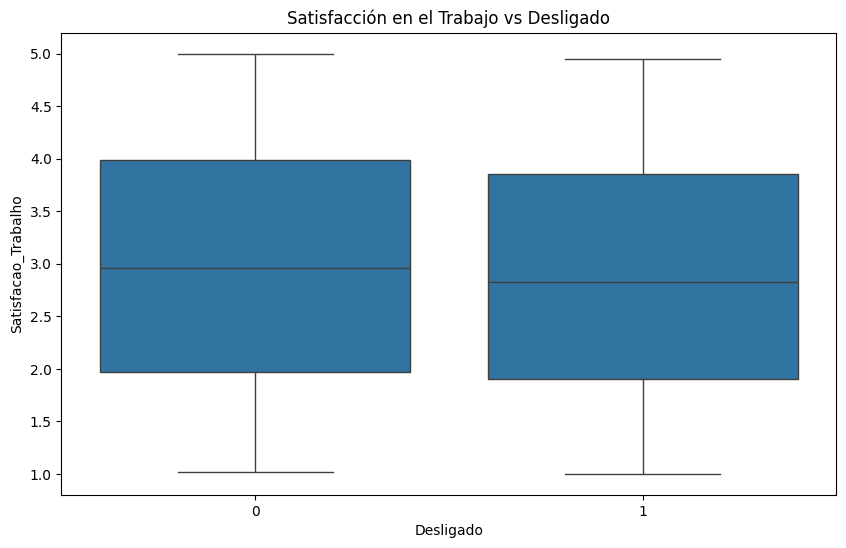

In [72]:
# Boxplot de Satisfacao_Trabalho por Desligado
plt.figure(figsize=(10, 6))
sns.boxplot(x='Desligado', y='Satisfacao_Trabalho', data=df)
plt.title('Satisfacción en el Trabajo vs Desligado')
plt.show()

In [73]:
#aqui analizamos a quiantidade de pessoas que foram demitidas e a idade media media das pesoas
columna_idade = df["Idade"]
rango_idade_comun = df.Idade.value_counts().idxmax()
dados_filtrados = df.loc[df["Idade"] == rango_idade_comun]
quantidade_demitidos = len(dados_filtrados)
print(f"Rango de idade más común: {rango_idade_comun}")
print(f"quantidade de demitidos no rango: {quantidade_demitidos}")

Rango de idade más común: 24
quantidade de demitidos no rango: 50


In [74]:
# Selección de características (features) y la variable objetivo (target)
X = df.drop(columns=['Desligamento','Desligado'])
y = df['Desligado']
# quitamos nuestra Y la variable que seria nuestra X
# Verificar los tipos de datos en X###
print(X.dtypes)

# Eliminar columnas de tipo datetime si existen###
X = X.select_dtypes(exclude=['datetime64[ns]'])


# Codificar variables categóricas si es necesario
X = pd.get_dummies(X, drop_first=True)


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Meses_de_Servico          int64
Idade                     int64
Pontuacao_Desempenho    float64
Satisfacao_Trabalho     float64
Nivel_Cargo              object
Salario                 float64
Horas_Extras            float64
dtype: object


In [75]:
# trenameto do modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# prevdiçoes
y_pred = model.predict(X_test)

Accuracy: 0.8051282051282052
Confusion Matrix:
 [[150   2]
 [ 36   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       152
           1       0.78      0.16      0.27        43

    accuracy                           0.81       195
   macro avg       0.79      0.57      0.58       195
weighted avg       0.80      0.81      0.75       195



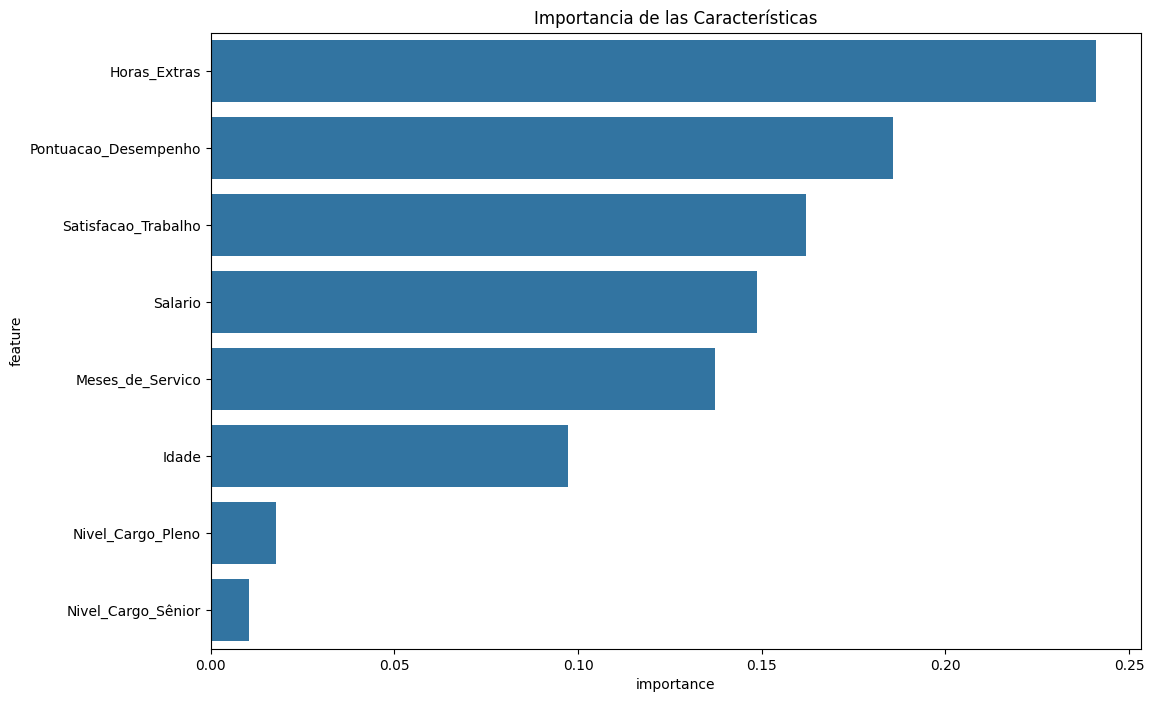

In [76]:
# Evaluar el modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.show()

##Finalizamos nossa analise

 mas agora podemos continuar nossa analises considerando varios aspectos que estao fona do nosso dataset que nos ajudariam a prediser mais nossa meta de saber diferenciar a pessoa certa de a pessoa errada para trabalhar conosco na empresa

datos que mais influyen en el exito de una persona em una empresa

Habilidades y conocimientos, Actitud y motivación,Aptitud para el aprendizaje, Habilidades interpersonales

Factores externos:

Adecuación a la cultura de la empresa:,
Demandas del puesto:,
Oportunidades de crecimiento: ,
Después de la contratación:

Factores internos:

Desempeño laboral:
Capacidad de adaptación:,
Proactividad:
Trabajo en equipo:
Liderazgo:
Factores externos:

Relaciones con los compañeros:
Mentoría:
Oportunidades de formación:
Reconocimiento y recompensa:

#Explicarlo al Público:
##Propósito del Análisis:

"Este análisis se realizó para identificar las variables más influyentes en la rotación de empleados de nuestra empresa. Utilizamos un modelo de Regresión Logística para cuantificar la importancia de cada variable."

###Hallazgos Clave:

"El número de horas extras trabajadas por los empleados es la variable más influyente. Esto sugiere que las cargas de trabajo excesivas podrían estar impulsando la rotación."

"El desempeño de los empleados también es un factor significativo. Tanto un alto desempeño como un bajo desempeño pueden influir en la decisión de un empleado de dejar la empresa."

"El nivel del cargo también importa, especialmente para los empleados séniores, quienes tienen una probabilidad más alta de dejar la empresa."

"Aunque la edad, el salario, la satisfacción laboral y el tiempo de servicio tienen menos impacto, siguen siendo factores a considerar." Acciones Recomendadas:

"Dado que las horas extras son un factor significativo, podríamos considerar estrategias para reducir las horas extras o compensarlas adecuadamente." "Podemos implementar programas de retención y desarrollo profesional para empleados con alto y bajo desempeño."

"Es importante entender las necesidades y expectativas de nuestros empleados séniores para mejorar su retención." Conclusión:

"Este análisis nos proporciona una visión clara de los factores que más influyen en la rotación de empleados. Con esta información, podemos diseñar estrategias más efectivas para retener a nuestros empleados y reducir los costos asociados con la rotación."